In [10]:
#импорт библиотек
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('C:/Users/79689/Desktop/Python/Project/test/test.csv')

In [12]:
print(df)

       Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco 

In [13]:
#Удален Business класс
df1 = df[df['Class'] != 'Business']

In [14]:
print(df1)

       Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
5               5  39177    Male     Loyal Customer   16  Business travel   
8               8  27508    Male     Loyal Customer   47  Business travel   
...           ...    ...     ...                ...  ...              ...   
25966       25966  30263    Male  disloyal Customer   42  Business travel   
25968       25968  86816    Male     Loyal Customer   41  Business travel   
25970       25970  25309  Female  disloyal Customer   36  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco         

In [15]:
print(df1.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [16]:
df1_filtered = df1.loc[:, ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
                           'Cleanliness']]
print(df1_filtered)

       Inflight wifi service  Departure/Arrival time convenient  \
0                          5                                  4   
2                          2                                  0   
4                          2                                  3   
5                          3                                  3   
8                          5                                  2   
...                      ...                                ...   
25966                      4                                  4   
25968                      2                                  2   
25970                      1                                  5   
25973                      2                                  5   
25975                      2                                  5   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                           3              4               3                4   
2                           2    

In [17]:
df1_filtered.dropna(inplace=True)

print(df1_filtered)

       Inflight wifi service  Departure/Arrival time convenient  \
0                          5                                  4   
2                          2                                  0   
4                          2                                  3   
5                          3                                  3   
8                          5                                  2   
...                      ...                                ...   
25966                      4                                  4   
25968                      2                                  2   
25970                      1                                  5   
25973                      2                                  5   
25975                      2                                  5   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                           3              4               3                4   
2                           2    

In [18]:
correlation_matrix = df1_filtered[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
                           'Cleanliness']].corr()

print(correlation_matrix)

                                   Inflight wifi service  \
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.050150   
Ease of Online booking                          0.648053   
Gate location                                   0.014666   
Food and drink                                  0.184789   
Online boarding                                 0.688081   
Seat comfort                                    0.144783   
Inflight entertainment                          0.220363   
On-board service                                0.061077   
Leg room service                                0.141513   
Baggage handling                                0.038940   
Checkin service                                 0.024954   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.050150   
Ease of Online booking                          0.648053   
Gate location                           

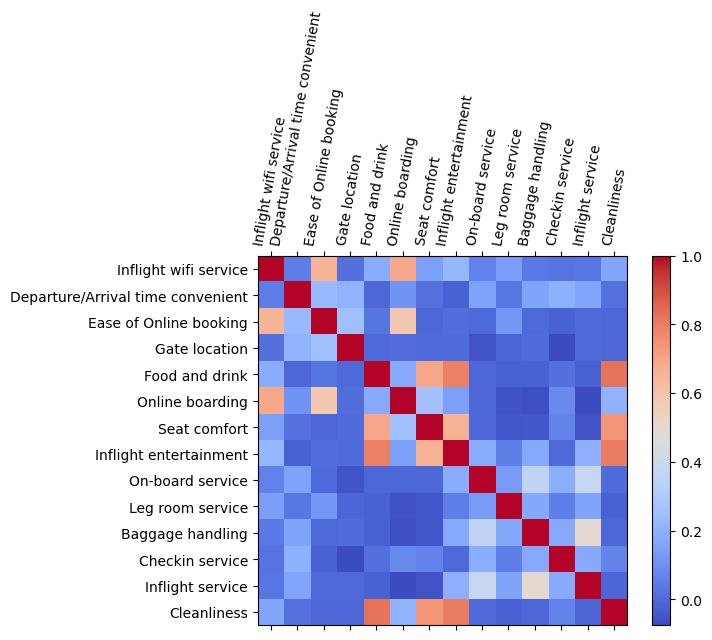

In [19]:
corr = df1_filtered.corr()

# Визуализация матрицы корреляции
fig, ax = plt.subplots()
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=80)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(cax)

plt.show()


In [20]:
df1_filtered.describe() #Статистика по столбцам

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000
mean,2.675098,3.168163,2.603294,2.961650,3.084118,2.828574,3.147244,3.082338,3.099251,3.070247,3.429938,3.115718,3.460426,3.088569
std,1.244958,1.541748,1.329432,1.194609,1.372867,1.340834,1.371302,1.375997,1.308021,1.348988,1.190718,1.310579,1.204441,1.366900
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13481 entries, 0 to 25975
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Inflight wifi service              13481 non-null  int64
 1   Departure/Arrival time convenient  13481 non-null  int64
 2   Ease of Online booking             13481 non-null  int64
 3   Gate location                      13481 non-null  int64
 4   Food and drink                     13481 non-null  int64
 5   Online boarding                    13481 non-null  int64
 6   Seat comfort                       13481 non-null  int64
 7   Inflight entertainment             13481 non-null  int64
 8   On-board service                   13481 non-null  int64
 9   Leg room service                   13481 non-null  int64
 10  Baggage handling                   13481 non-null  int64
 11  Checkin service                    13481 non-null  int64
 12  Inflight service       

In [22]:
col = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
                                   'Cleanliness']
from pandas.plotting import scatter_matrix
scatter_matrix(df1_filtered[col], alpha=0.05, figsize = (100,100))

array([[<Axes: xlabel='Inflight wifi service', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Departure/Arrival time convenient', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Ease of Online booking', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Gate location', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Food and drink', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Online boarding', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Seat comfort', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Inflight entertainment', ylabel='Inflight wifi service'>,
        <Axes: xlabel='On-board service', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Leg room service', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Baggage handling', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Checkin service', ylabel='Inflight wifi service'>,
        <Axes: xlabel='Inflight service', ylabel='Inflight wifi service'>,
  

In [23]:
df1_filtered[col].corr()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Inflight wifi service,1.000000,0.050150,0.648053,0.014666,0.184789,0.688081,0.144783,0.220363,0.061077,0.141513,0.038940,0.024954,0.032735,0.165041
Departure/Arrival time convenient,0.050150,1.000000,0.233460,0.208559,-0.004861,0.114139,0.020393,-0.018032,0.150087,0.033555,0.159107,0.199566,0.160925,0.017784
Ease of Online booking,0.648053,0.233460,1.000000,0.254523,0.026252,0.587180,-0.006126,0.010923,-0.001033,0.121725,0.000108,-0.020017,-0.002300,-0.005688
Gate location,0.014666,0.208559,0.254523,1.000000,0.000565,0.012754,0.001500,0.002508,-0.051971,-0.008594,0.002466,-0.074731,-0.000256,-0.004462
Food and drink,0.184789,-0.004861,0.026252,0.000565,1.000000,0.178989,0.691279,0.791203,-0.006054,-0.019494,-0.017315,0.015328,-0.017323,0.819988
Online boarding,0.688081,0.114139,0.587180,0.012754,0.178989,1.000000,0.259881,0.143636,-0.004764,-0.054083,-0.062561,0.082127,-0.074368,0.209248
Seat comfort,0.144783,0.020393,-0.006126,0.001500,0.691279,0.259881,1.000000,0.658039,-0.006576,-0.046215,-0.041681,0.065602,-0.051740,0.740489
Inflight entertainment,0.220363,-0.018032,0.010923,0.002508,0.791203,0.143636,0.658039,1.000000,0.183615,0.053275,0.176436,0.000105,0.195516,0.800615
On-board service,0.061077,0.150087,-0.001033,-0.051971,-0.006054,-0.004764,-0.006576,0.183615,1.000000,0.134914,0.355122,0.188122,0.377549,0.003423
Leg room service,0.141513,0.033555,0.121725,-0.008594,-0.019494,-0.054083,-0.046215,0.053275,0.134914,1.000000,0.169443,0.055027,0.157291,-0.018823


In [24]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

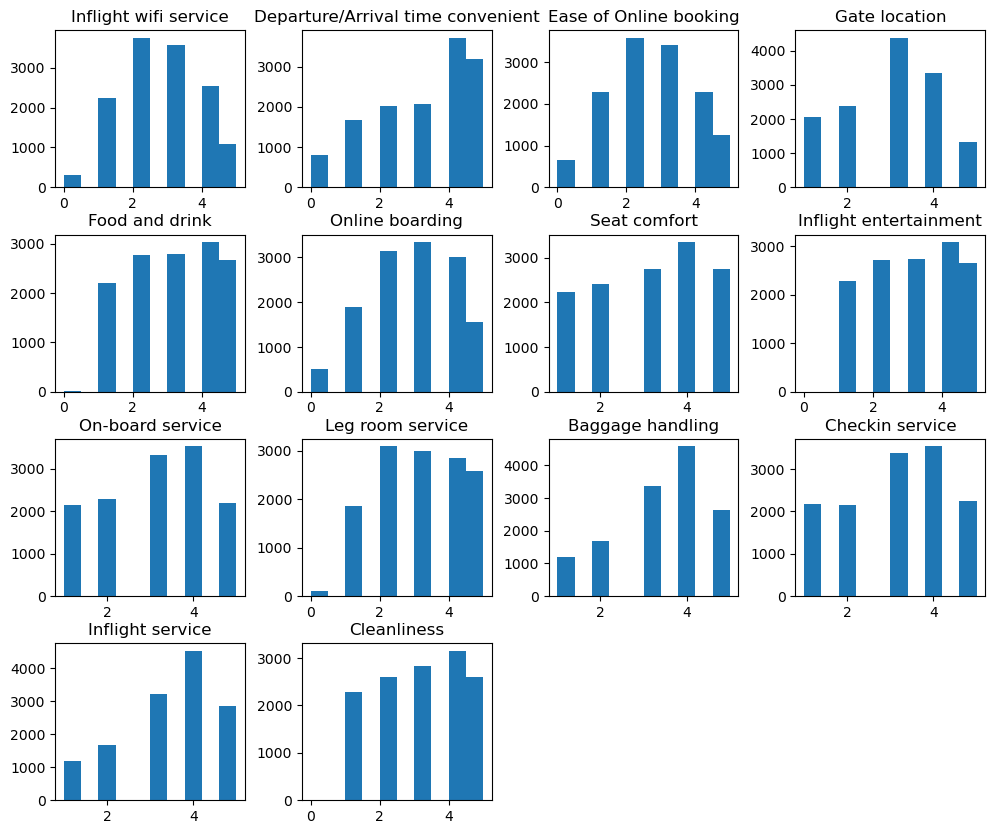

In [25]:
df1_filtered.hist(bins = 10, figsize = (12,10), grid = False)
plt.show()

In [26]:
col = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
                   'Cleanliness']
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True)
from sklearn import preprocessing
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(df1_filtered, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

In [27]:
df1_filtered.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4
5,3,3,3,3,5,5,3,5,4,3,1,1,2,5
8,5,2,2,2,5,5,5,5,2,2,5,3,3,5


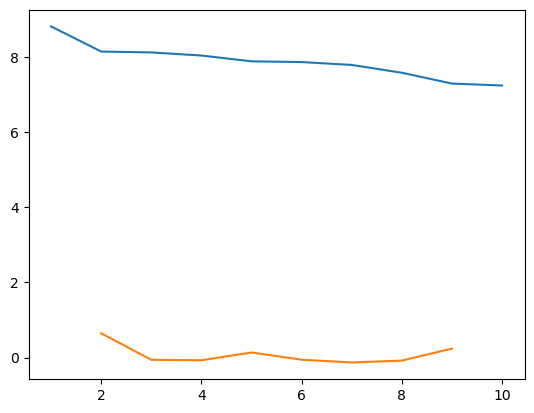

Рекомендованное количество кластеров: 2


In [28]:
# Метод локтя. Позволяет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

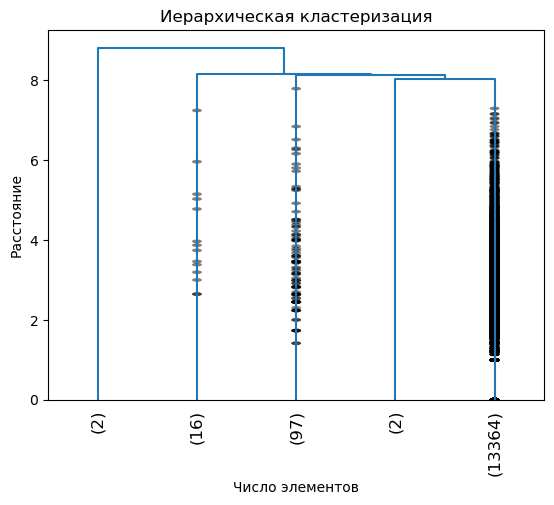

In [29]:
#Кластеризация
from scipy.cluster.hierarchy import dendrogram
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Иерархическая кластеризация')
        plt.xlabel('Число элементов')
        plt.ylabel('Расстояние')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
nClust=5
#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [30]:
df1_filtered.shape

(13481, 14)

In [31]:
from scipy.cluster.hierarchy import fcluster
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([5, 5, 5, ..., 5, 5, 5], dtype=int32)

In [32]:
col

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [33]:
# к оригинальным данным добавляем номер кластера
df1_filtered['I']=clusters
res=df1_filtered.groupby('I')[col].mean()
res['Число элементов']=df1_filtered.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Число элементов
I,,,,,,,,,,,,,,,
1,5.000000,4.000000,0.000000,4.000000,1.500000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,4.500000,2
2,4.562500,1.937500,4.312500,4.187500,4.312500,3.687500,4.187500,4.312500,2.812500,2.812500,1.812500,1.812500,1.562500,4.312500,16
3,0.639175,0.494845,0.453608,2.515464,3.835052,0.752577,3.237113,3.835052,2.628866,3.402062,2.505155,2.536082,2.907216,3.773196,97
4,4.500000,5.000000,5.000000,2.000000,2.000000,5.000000,5.000000,2.000000,3.500000,1.000000,2.500000,2.000000,2.500000,2.000000,2
5,2.686995,3.188641,2.616881,2.963409,3.077597,2.842412,3.144942,3.075875,3.103262,3.068916,3.439090,3.121820,3.467225,3.082086,13364


In [34]:
df1_filtered[df1_filtered['I']==5]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,I
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,5
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,5
5,3,3,3,3,5,5,3,5,4,3,1,1,2,5,5
8,5,2,2,2,5,5,5,5,2,2,5,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25966,4,4,4,2,3,4,3,3,3,1,2,2,3,3,5
25968,2,2,2,2,2,2,2,2,2,3,3,2,3,2,5
25970,1,5,1,3,4,1,4,4,5,2,5,2,3,4,5
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2,5


In [35]:
col

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [36]:
df1_filtered.groupby('I').mean()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
I,,,,,,,,,,,,,,
1,5.000000,4.000000,0.000000,4.000000,1.500000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,4.500000
2,4.562500,1.937500,4.312500,4.187500,4.312500,3.687500,4.187500,4.312500,2.812500,2.812500,1.812500,1.812500,1.562500,4.312500
3,0.639175,0.494845,0.453608,2.515464,3.835052,0.752577,3.237113,3.835052,2.628866,3.402062,2.505155,2.536082,2.907216,3.773196
4,4.500000,5.000000,5.000000,2.000000,2.000000,5.000000,5.000000,2.000000,3.500000,1.000000,2.500000,2.000000,2.500000,2.000000
5,2.686995,3.188641,2.616881,2.963409,3.077597,2.842412,3.144942,3.075875,3.103262,3.068916,3.439090,3.121820,3.467225,3.082086


In [40]:
#Классификация
X = df1_filtered[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
          'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
          'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
          'Cleanliness']]
y = df1_filtered['I']
#Разделение на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Прогнозирование на тестовом наборе
y_pred = log_reg.predict(X_test)
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print('Точность модели логистической регрессии:', accuracy)

Точность модели логистической регрессии: 0.9484612532443456


C:\Users\79689\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
